# Laboratorio 3
### RNN

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

In [11]:
data = pd.read_csv('sunspots.csv')
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


,count,mean,std,min,25%,50%,75%,max
Month,2820.0,6.500000,3.452665,1.0,3.75,6.5,9.250,12.0
Sunspots,2820.0,51.265957,43.448971,0.0,15.70,42.0,74.925,253.8
Year,2820.0,1866.000000,67.850074,1749.0,1807.00,1866.0,1925.000,1983.0
MonthOfYear,2820.0,6.500000,3.452665,1.0,3.75,6.5,9.250,12.0


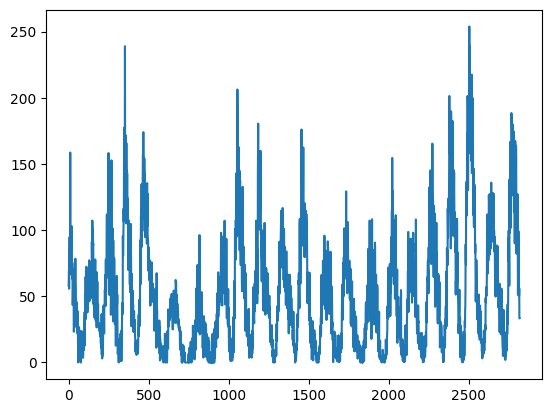

In [17]:
#  Convert 'Month' to datetime and extract numerical features
data["Month"] = pd.to_datetime(data["Month"])
data["Year"] = data["Month"].dt.year
data["Month"] = data["Month"].dt.month

data["Sunspots"].plot()

data.describe().transpose()


In [13]:

# Prepare features (X) and target (y)
X = data[['Year', 'Month']].values
y = data['Sunspots'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test_scaled)

def predict_sunspots(year, month):
    input_data = np.array([[year, month]])
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)
    return prediction[0][0]



/Users/adrian/.pyenv/versions/3.10.14/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1682.6504
Test Loss: 1757.5224609375
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
